# Map of sub-domain of ANHA12

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import pickle
import xarray as xr

%matplotlib inline

###### Parameters:

In [2]:
# domain dimensions:
jmin, jmax = 159, 799
imin, imax = 1139, 2179

# Resolution of grid cells to show in figure:
grid_reso = 10

###### Load files:

In [3]:
mesh         = xr.open_dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask_Pb-20220317.nc')
mesh_lon     = mesh['nav_lon'].values
mesh_lat     = mesh['nav_lat'].values
mesh_bathy   = mesh['tmask'][0,:,:,:].values
bathy_masked = np.ma.masked_where((mesh_bathy> 0.1), mesh_bathy)
ocean_masked = np.ma.masked_where((mesh_bathy<0.1), mesh_bathy)
depths       = mesh['nav_lev'].values

In [4]:
# data = nc.Dataset('/data/brogalla/run_storage/spin-up0-pb/ANHA12_EXH006_5d_20020101_20021231_ptrc_T_20020101-20020105.nc')
# data = nc.Dataset('/data/brogalla/run_storage/Mn-reference-202206/ANHA12_ref-spin-up0_20220422/ANHA12_EXH006_5d_20020101_20021231_ptrc_T_20020106-20020110.nc')
data = nc.Dataset('/data/brogalla/run_storage/Mn-extended-domain-202210/Mn-extended-2015-20220927/ANHA12_EXH006_5d_20150101_20151231_ptrc_T_20150913-20150917.nc')

In [6]:
dmn = np.array(data.variables['dissolmn'])[0,:,:,:]
omn = np.array(data.variables['oxidismn'])[0,:,:,:]
# dmn_masked = np.ma.masked_where((mask[:,imin:imax,jmin:jmax] == 0), dmn)

###### Figure:

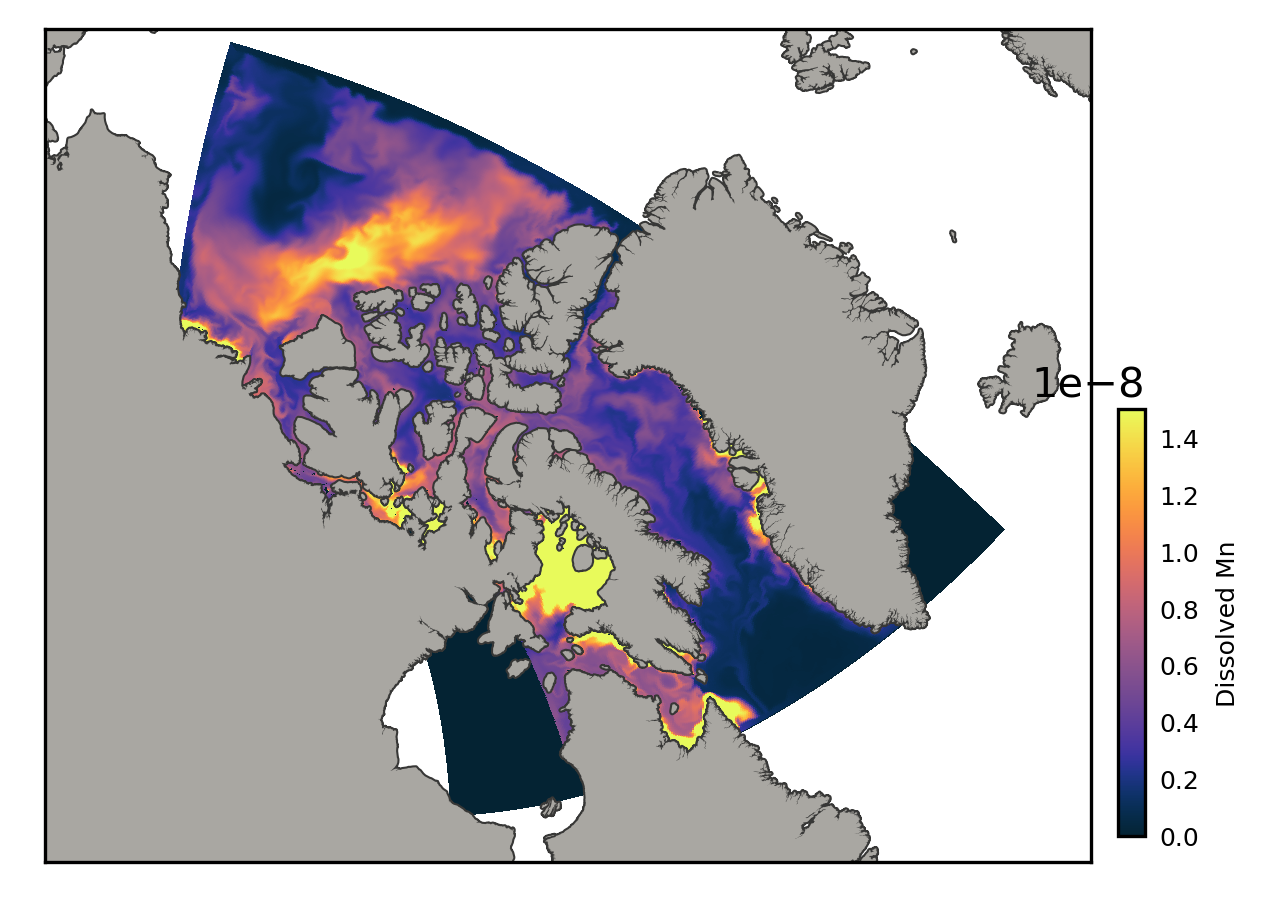

In [7]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/pb-surface.pickle','rb'))
depth=0
variable = dmn[depth,:,:]

x, y = proj1(mesh_lon[imin:imax,jmin:jmax], mesh_lat[imin:imax,jmin:jmax]) 
CB = proj1.pcolormesh(x, y, variable, vmin=0, vmax=15e-9, cmap=cmocean.cm.thermal)

# Color bar: --------------------------------------------------------------------------------
cbaxes = fig.add_axes([0.92, 0.155, 0.02, 0.38]);
CBar   = plt.colorbar(CB, ax=ax1, cax=cbaxes); 
CBar.set_label('Dissolved Mn', fontsize=6)
CBar.ax.tick_params(axis='y', length=0, labelsize=6)

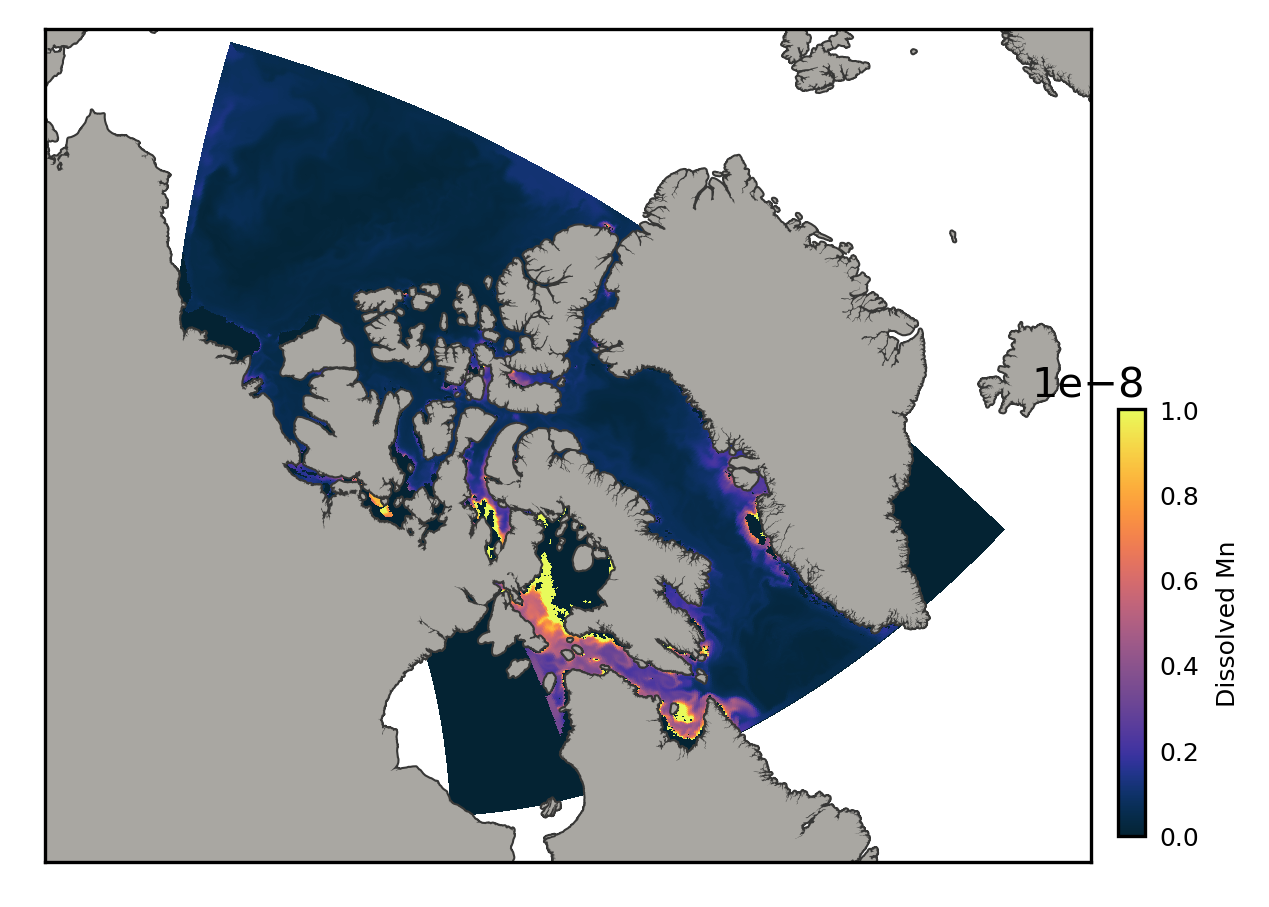

In [9]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/pb-surface.pickle','rb'))
depth=20
variable = dmn[depth,:,:]

x, y = proj1(mesh_lon[imin:imax,jmin:jmax], mesh_lat[imin:imax,jmin:jmax]) 
CB = proj1.pcolormesh(x, y, variable, vmin=0, vmax=10e-9, cmap=cmocean.cm.thermal)

# Color bar: --------------------------------------------------------------------------------
cbaxes = fig.add_axes([0.92, 0.155, 0.02, 0.38]);
CBar   = plt.colorbar(CB, ax=ax1, cax=cbaxes); 
CBar.set_label('Dissolved Mn', fontsize=6)
CBar.ax.tick_params(axis='y', length=0, labelsize=6)

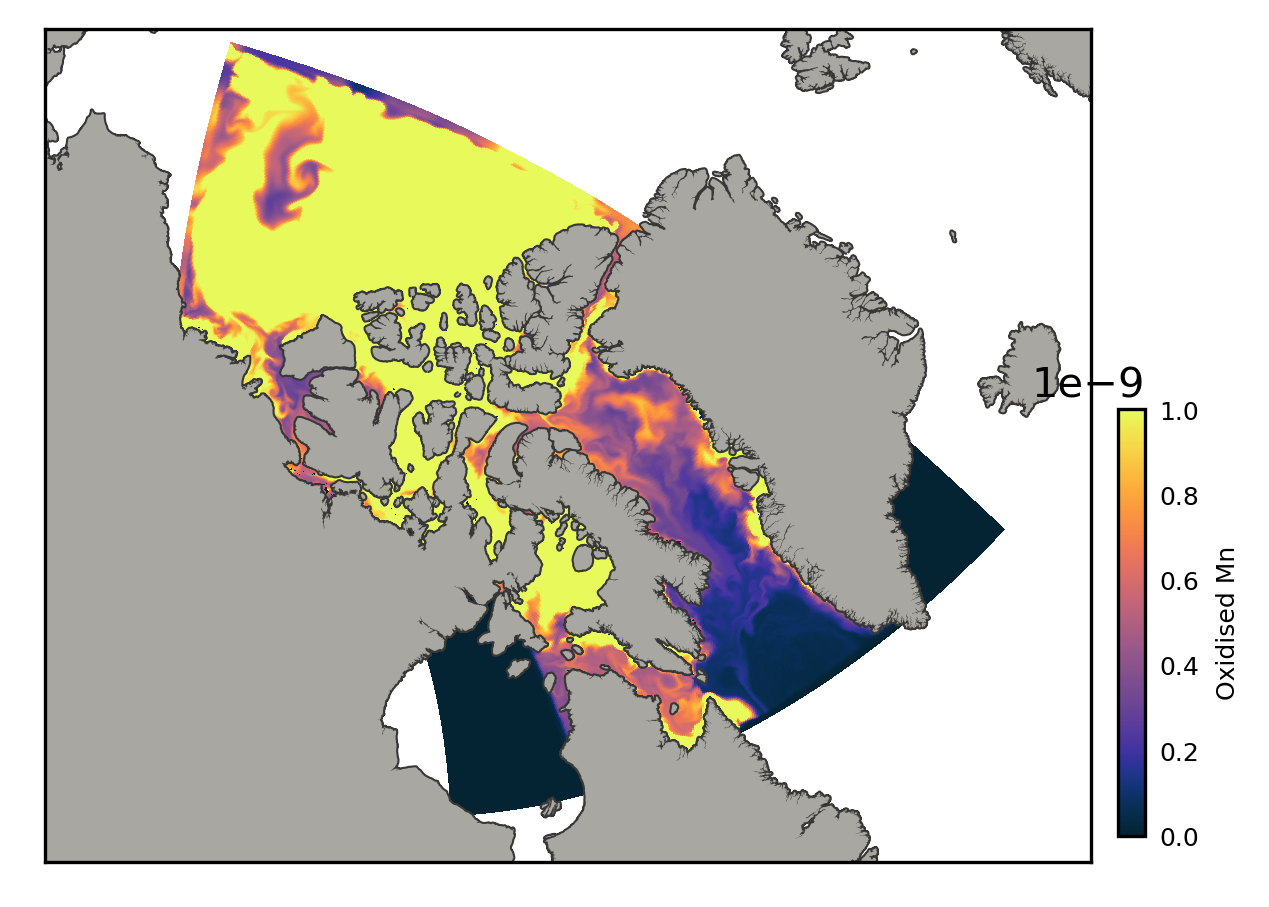

In [13]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/pb-surface.pickle','rb'))
depth=0
variable = omn[depth,:,:]

x, y = proj1(mesh_lon[imin:imax,jmin:jmax], mesh_lat[imin:imax,jmin:jmax]) 
CB = proj1.pcolormesh(x, y, variable, vmin=0, vmax=1e-9, cmap=cmocean.cm.thermal)

# Color bar: --------------------------------------------------------------------------------
cbaxes = fig.add_axes([0.92, 0.155, 0.02, 0.38]);
CBar   = plt.colorbar(CB, ax=ax1, cax=cbaxes); 
CBar.set_label('Oxidised Mn', fontsize=6)
CBar.ax.tick_params(axis='y', length=0, labelsize=6)

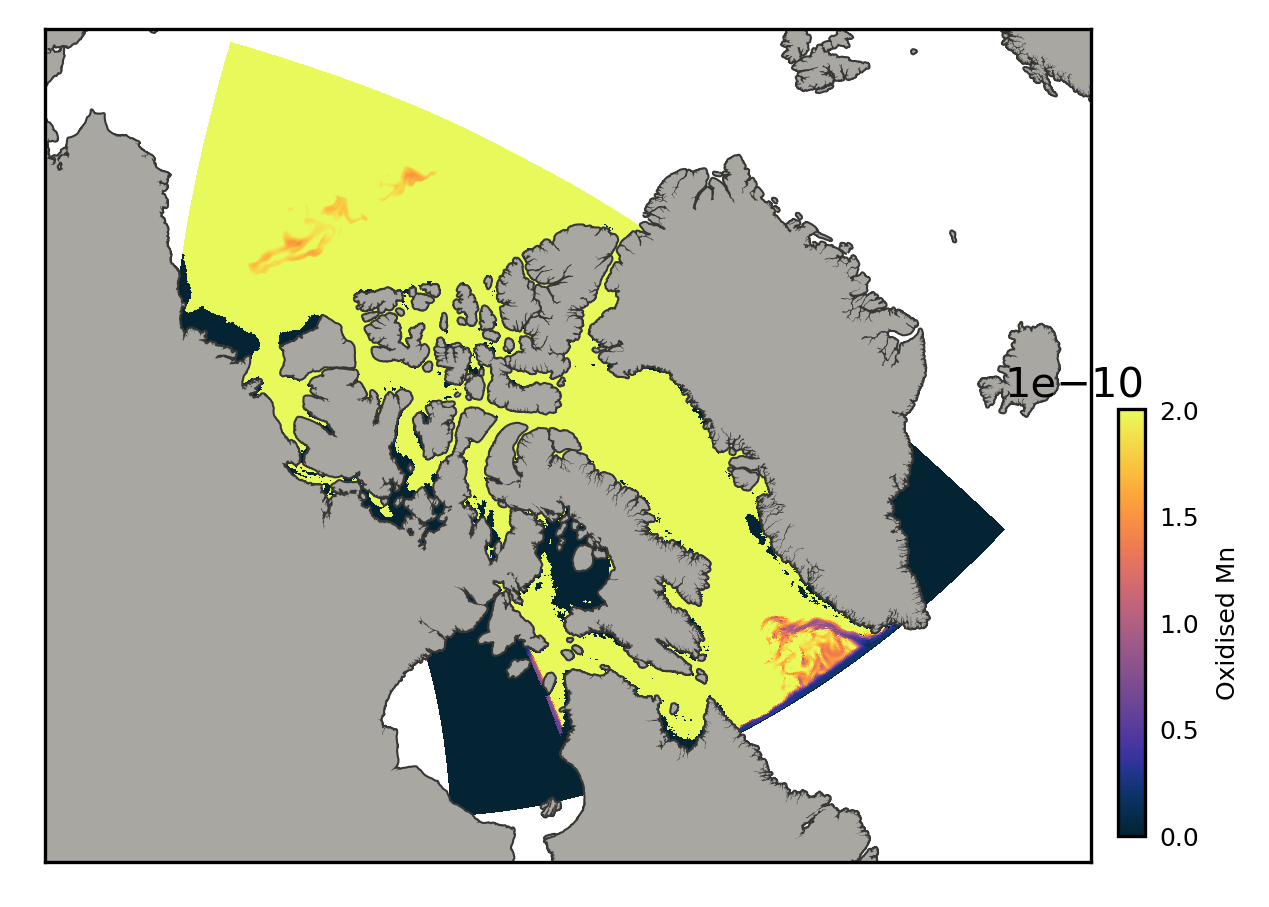

In [14]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/pb-surface.pickle','rb'))
depth=20
variable = omn[depth,:,:]

x, y = proj1(mesh_lon[imin:imax,jmin:jmax], mesh_lat[imin:imax,jmin:jmax]) 
CB = proj1.pcolormesh(x, y, variable, vmin=0, vmax=0.2e-9, cmap=cmocean.cm.thermal)

# Color bar: --------------------------------------------------------------------------------
cbaxes = fig.add_axes([0.92, 0.155, 0.02, 0.38]);
CBar   = plt.colorbar(CB, ax=ax1, cax=cbaxes); 
CBar.set_label('Oxidised Mn', fontsize=6)
CBar.ax.tick_params(axis='y', length=0, labelsize=6)